# Image Compression using Singular Value Decompositon (SVD)

This notebook demostrate the effectiveness of information compression with SVD. A B&W picture can be represented as a matrix of pixels. Each pixel is valued from 0 to 255, based on the grayscale. Hence, a raw file of a picture is represented as a gigantic matrix. For example, a 4K image has 3,840 horizontal pixels and 2,160 vertical pixels, for a total of about 8.3 million pixels. 

Among these pixels, there are usually correlation between the columns and between the rows, and thus, the same information can be represented by transformating the coordinate systems of the matrix using SVD. By keeping the first r most prominent modes, we can reduce the data storage by a vast amount, while keeping an acceptable level of information.

This notebook is aimed at showing the effectiveness of SVD in image compression.



## Import python libraries


In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from matplotlib.image import imread
plt.rcParams['figure.figsize'] = [16, 8]

## Read the image 

The image read is stored as an numpy array. Matrix operations can be applied on numpy arrays directly.

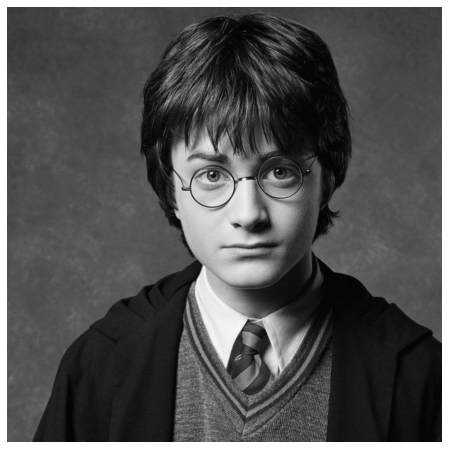

In [2]:
url = 'https://www.irishtimes.com/polopoly_fs/1.3170107.1501253408!/image/image.jpg_gen/derivatives/ratio_1x1_w1200/image.jpg'

A = io.imread(url)    # read the .jpg file into an numpy array
X = np.mean(A, -1)    # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [3]:
X.shape

(1200, 1200)

## Singular Value Decompostion (SVD)



In [4]:
U, S, VT = np.linalg.svd(X, full_matrices=False)  # economy svd
S = np.diag(S)  

## Constructed Compressed Images

Modes used: 5, 20 and 100

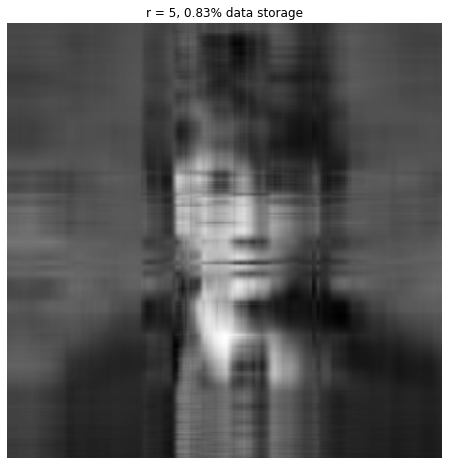

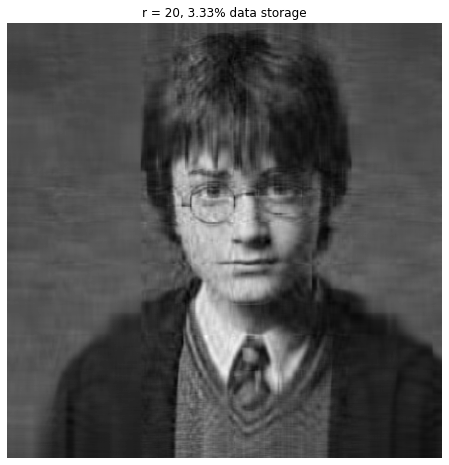

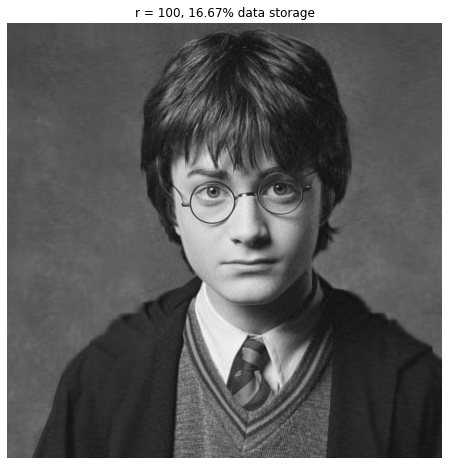

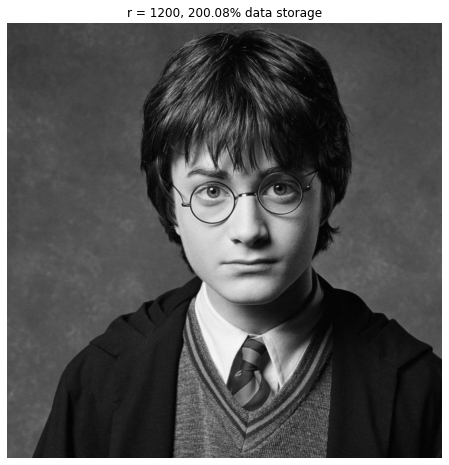

In [5]:
j = 0
for r in (5, 20, 100, 1200):
  # Construct approximated imaged
  Xapprox = U[:,:r] @ S[:r,:r] @ VT[:r,:]
  data_storage_ratio = (U[:,:r].size + VT[:r,:].size + r) / X.size
  plt.figure(j+1)
  j += 1
  img = plt.imshow(Xapprox)
  img.set_cmap('gray')
  plt.axis('off')
  plt.title('r = ' + str(r) + ', ' + str(round(data_storage_ratio * 100, 2)) + '% data storage')
  plt.show()


## Singular Values

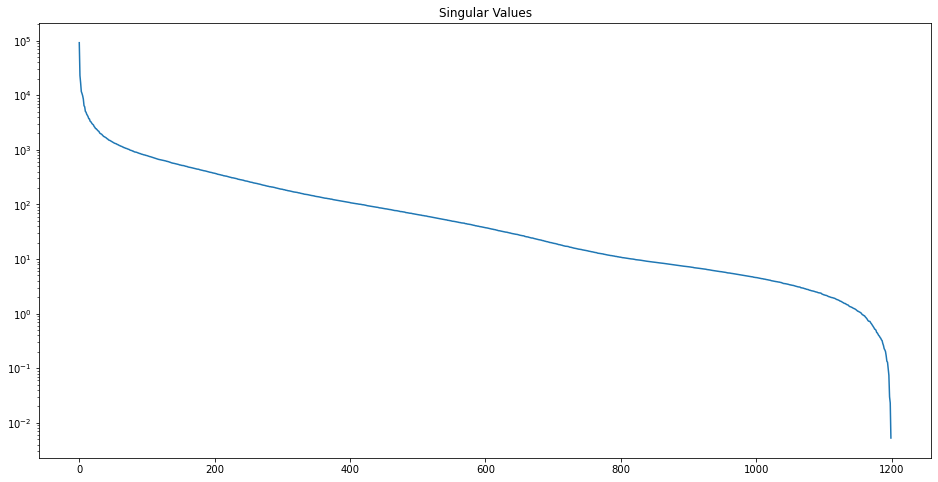

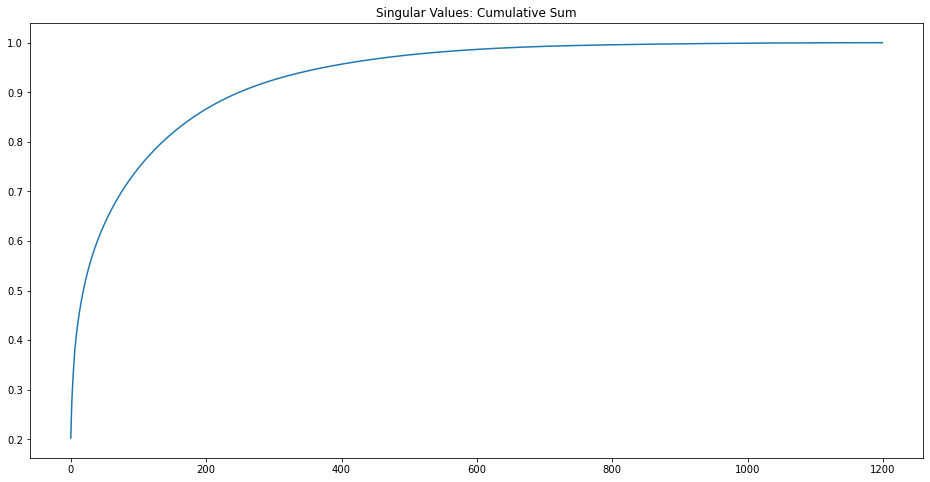

In [6]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title("Singular Values")
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title("Singular Values: Cumulative Sum")
plt.show()

## Conclusion

Although high fidelity images are stored as a hugh matrix, implying extremely high-dimensional, they are very likely of low rank. Information can, thus, be compressed effectively with singular value decomposition. 

The Harry Potter example shows that with the first 5 modes (\~0.83% of the data), a basic structure of a human potrait can be reconstructed, but the identity remains hard to tell. With the first 20 modes (\~3.33% of the data), we can identity the person in the vague image reconstruction. With the first 100 modes (\~16.7% of the data), the image is mostly reconstructed with clear details. 

This shows the power of SVD in the application of image compression.

## Reference

This exercise and code reference the lecture given by Prof. Steven Brunton (Department of Mechanical Engineering, University of Washington)

https://youtu.be/H7qMMudo3e8